<a href="https://colab.research.google.com/github/inginddie/Maestria/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/omarEssam-11/Heart-Attack-Prediction/refs/heads/main/Heart%20Attack%20Prediction%20Dataset.csv")

In [ ]:
# prompt: dividir Blood presure en dos columnas

# Split the 'trtbps' column into two new columns
df[['systolic_bp', 'diastolic_bp']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric, handling potential errors
df['systolic_bp'] = pd.to_numeric(df['systolic_bp'], errors='coerce')
df['diastolic_bp'] = pd.to_numeric(df['diastolic_bp'], errors='coerce')

# Print the updated DataFrame (optional)
print(df.head())


  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...        BMI  Triglycerides  \
0               0        1        0  ...  31.251233            286   
1               1        1        1  ...  27.194973            235   
2               0        0        0  ...  28.176571            587   
3               1        1        0  ...  36.464704            378   
4               1        1        1  ...  21.809144            231   

  Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                               0  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

## ¿Fumar aumenta la probabilidad de ataque cardiaco?

In [ ]:
# prompt: crear tabla de contingencia de Smoking contra  Heart Attack Risk

import pandas as pd
from sklearn.model_selection import train_test_split
# ... (your existing code)

# Create the contingency table
contingency_table = pd.crosstab(train['Smoking'], train['Heart Attack Risk'], margins=True)
contingency_table


Heart Attack Risk,0,1,All
Smoking,,,
0,451,260,711
1,4048,2251,6299
All,4499,2511,7010


In [ ]:
2251/6299

0.35735831084299097

In [ ]:
260/711

0.3656821378340366

## La edad influye en el riesgo de tener un ataque cardiaco

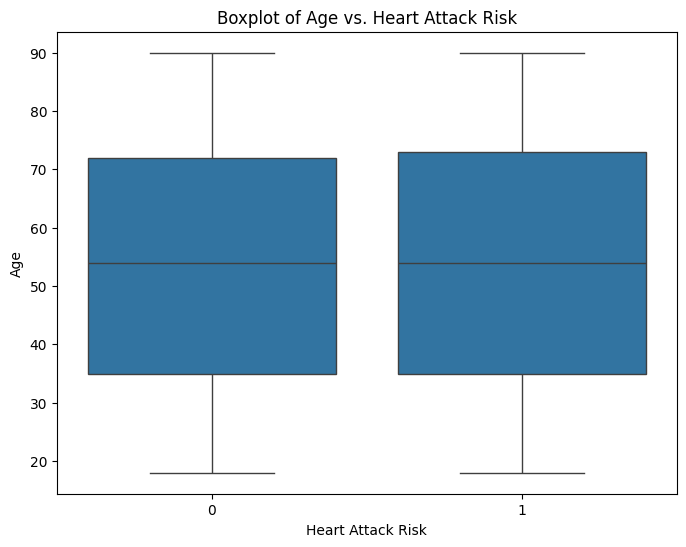

In [ ]:
# prompt: realizar boxplot de age contra Heart Attack Risk

import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Attack Risk', y='Age', data=train)
plt.title('Boxplot of Age vs. Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Age')
plt.show()


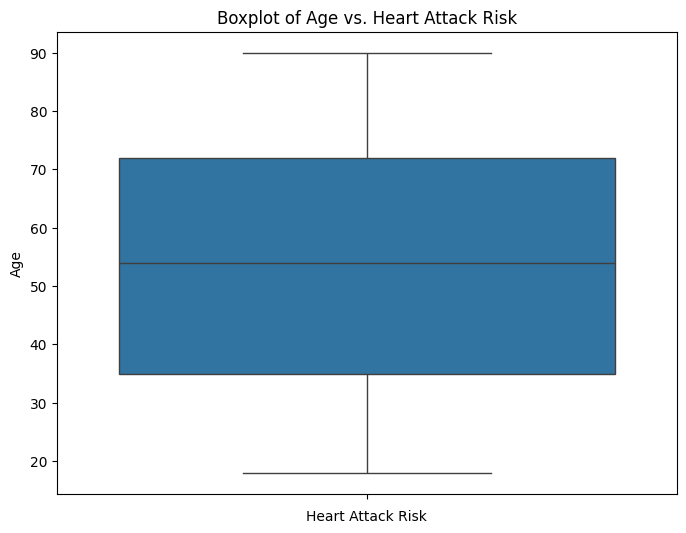

In [ ]:
# prompt: crear boxplot de Age

# Assuming df is already defined and loaded as in the previous code

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=df)
plt.title('Boxplot of Age vs. Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Age')
plt.show()


## La obesidad influye en el riesgo de ataque?

In [ ]:
# prompt: crear tabla de contingencia con train de Obesity vs Heart Attack Risk

# Create the contingency table
contingency_table_obesity = pd.crosstab(train['Obesity'], train['Heart Attack Risk'], margins=True)
contingency_table_obesity


Heart Attack Risk,0,1,All
Obesity,,,
0,2202,1284,3486
1,2297,1227,3524
All,4499,2511,7010


In [ ]:
1227/3524

0.3481838819523269

In [ ]:
1284/3486

0.3683304647160069

In [ ]:
# prompt: crear tabla de contingencia con train de Previous Heart Problem vs Heart Attack Risk

# Create the contingency table
contingency_table_previous_heart_problem = pd.crosstab(train['Previous Heart Problems'], train['Heart Attack Risk'], margins=True)
contingency_table_previous_heart_problem


Heart Attack Risk,0,1,All
Previous Heart Problems,,,
0,2252,1268,3520
1,2247,1243,3490
All,4499,2511,7010


In [ ]:
1243/3490

0.35616045845272204

In [ ]:
1268/3520

0.36022727272727273

In [ ]:

# Select only numeric columns
numeric_cols = train.select_dtypes(include=['number'])



In [ ]:
numeric_cols

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,systolic_bp,diastolic_bp
5967,84,217,75,1,1,1,1,1,17.107142,0,...,10,1.737428,153618,35.185856,544,3,6,0,125,83
8270,88,209,104,1,0,1,0,1,2.851698,1,...,1,11.876890,124693,30.991599,649,2,4,1,131,72
100,90,224,98,1,0,1,0,1,3.560949,1,...,10,9.618701,154900,22.851796,255,4,5,0,164,65
3410,27,376,65,0,0,1,0,1,19.035090,1,...,4,1.968503,151338,37.513424,796,1,4,0,141,70
1790,55,270,94,0,1,1,1,1,0.968271,0,...,6,7.252388,81127,23.269040,450,2,4,0,146,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,48,334,43,1,0,1,1,0,15.423465,1,...,5,2.091589,59858,33.549888,549,4,4,0,94,82
5191,68,188,69,0,0,1,0,1,11.689453,1,...,1,0.923109,60332,26.142883,410,2,9,0,116,70
5390,32,169,84,1,0,0,1,0,11.639443,0,...,9,5.730149,67604,39.512660,777,4,9,1,156,79
860,85,285,54,1,1,1,1,1,11.070968,0,...,2,8.001822,138980,25.499506,552,1,10,0,165,73


In [ ]:
# prompt: calcular feature importance en numeric_cols usando un DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# Assuming 'numeric_cols' DataFrame and 'train' DataFrame are defined as in your previous code.

# Define features (X) and target (y)
X = numeric_cols.drop('Heart Attack Risk', axis=1)  # Assuming 'Heart Attack Risk' is your target variable
y = train['Heart Attack Risk']

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
feature_importance_df


,Feature,Importance
13,Income,0.097943
15,Triglycerides,0.093790
14,BMI,0.093317
1,Cholesterol,0.086602
12,Sedentary Hours Per Day,0.083373
8,Exercise Hours Per Week,0.080407
0,Age,0.071507
19,diastolic_bp,0.068729
18,systolic_bp,0.066340
2,Heart Rate,0.066296


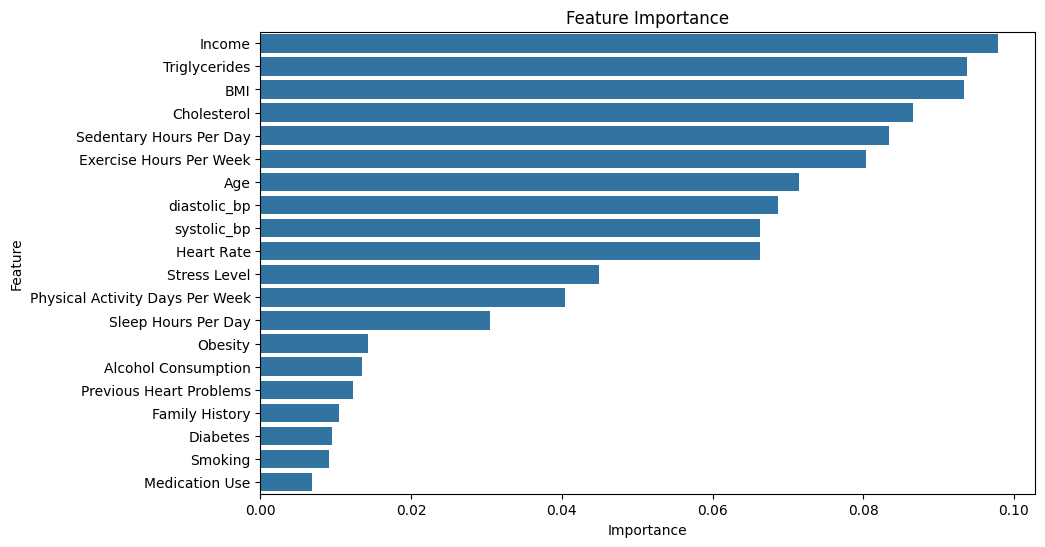

In [ ]:
# prompt: realizar grafica de barras de feature importance

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importance_df is defined as in the previous code

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
